<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/test_GeoInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://nbviewer.jupyter.org/github/coa-project/coabook/blob/master/test_GeoInfo.ipynb" target="_parent" ><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" height="25"  alt="View in Jupyter nbviewwer" align="middle" /></a>

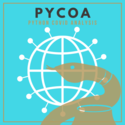

# Testing coa.geo.GeoInfo
[ⓒpycoa.fr](https://pycoa.fr)

This notebook is designed for the v1.0 version of pycoa.

Within the `cocoa.geo`, the `GeoInfo` provide data for all countries, using various databases.

## Making  PyCoA available

In [ ]:
!pip install --quiet git+https://github.com/coa-project/pycoa.git@v1.0
# !pip install --quiet --user git+https://github.com/coa-project/pycoa.git   # One may need to add the --user option at the "pip install" command, if it fails due to privilege lack. Under google colab, you must not add this option.

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 972kB 11.8MB/s 
     |████████████████████████████████| 10.1MB 17.7MB/s 
     |████████████████████████████████| 6.5MB 37.6MB/s 
     |████████████████████████████████| 245kB 41.4MB/s 
     |████████████████████████████████| 14.8MB 195kB/s 
     |████████████████████████████████| 235kB 47.3MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.


If `pycoa` is already installed on your system but is not in your path, you should specfiy it with the next lines (with the correct path); then please uncomment the second line.

In [ ]:
# import sys    # adapt the path for local install, if necessary. Under google colab, do not change anything
# sys.path.insert(1, '../pycoa')   

In [ ]:
# testing the correct install of pycoa
import importlib
coa_module_info = importlib.util.find_spec("coa")
if coa_module_info == None:
  raise ModuleNotFoundError("The coa module is not found. Please check your install")

import coa
if coa.__version__ != 'v1.0':
  raise ImportError("The pycoa package version is incorrect. Expecting v1.0")

In [ ]:
from coa.geo import GeoInfo as gi

## Getting some help

In [ ]:
help(gi)

Help on class GeoInfo in module coa.geo:

class GeoInfo(builtins.object)
 |  GeoInfo(gm=0)
 |  
 |  GeoInfo class definition. No inheritance from any other class.
 |  
 |  It should raise only CoaError and derived exceptions in case
 |  of errors (see pycoa.error)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, gm=0)
 |      __init__ member function.
 |  
 |  add_field(self, **kwargs)
 |      this is the main function of the GeoInfo class. It adds to
 |      the input pandas dataframe some fields according to
 |      the geofield field of input.
 |      The return value is the pandas dataframe.
 |      
 |      Arguments :
 |      field    -- should be given as a string of list of strings and
 |                  should be valid fields (see get_list_field() )
 |                  Mandatory.
 |      input    -- provide the input pandas dataframe. Mandatory.
 |      geofield -- provide the field name in the pandas where the
 |                  location is stored. Default : 'location

## Usage

In [ ]:
g=gi() # Create the instance of GeoManager 

### Currently known fields from countries

In [ ]:
g.get_list_field()

['area',
 'capital',
 'continent_code',
 'continent_name',
 'country_name',
 'fertility',
 'geometry',
 'median_age',
 'population',
 'region_code_list',
 'region_name_list',
 'urban_rate']

In [ ]:
g.get_source() # for all available fields

{'continent_code': 'pycountry_convert (https://pypi.org/project/pycountry-convert/)',
 'continent_name': 'pycountry_convert (https://pypi.org/project/pycountry-convert/)',
 'country_name': 'pycountry_convert (https://pypi.org/project/pycountry-convert/)',
 'population': 'https://www.worldometers.info/world-population/population-by-country/',
 'area': 'https://www.worldometers.info/world-population/population-by-country/',
 'fertility': 'https://www.worldometers.info/world-population/population-by-country/',
 'median_age': 'https://www.worldometers.info/world-population/population-by-country/',
 'urban_rate': 'https://www.worldometers.info/world-population/population-by-country/',
 'geometry': 'https://github.com/johan/world.geo.json/',
 'region_code_list': 'https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme',
 'region_name_list': 'https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme',
 'capital': 'https://en.wikipedia.org/wiki/List_of_cou

In [ ]:
g.get_source('geometry') # for a specific field

'geometry : https://github.com/johan/world.geo.json/'

### Adding info to a pandas

The pandas may come from `cocoa` or may be created within another framework

In [ ]:
import pandas as pd
country=['France','Italy','Germany','Tunisia','Egypt']
value=[1,2,3,4,5]
pf=pd.DataFrame({'location':country,'value':value})
pf

,location,value
0,France,1
1,Italy,2
2,Germany,3
3,Tunisia,4
4,Egypt,5


In [ ]:
g.add_field(input=pf,field='population') # adding one field

,location,value,population
0,France,1,65273511
1,Italy,2,60461826
2,Germany,3,83783942
3,Tunisia,4,11818619
4,Egypt,5,102334404


In [ ]:
g.add_field(input=pf,field=['capital','region_name_list','population','region_code_list']) # adding list of fields

,location,value,capital,region_name_list,population,region_code_list
0,France,1,Paris,"[Western Europe, Europe, World]",65273511,"[155, 150, 1]"
1,Italy,2,Rome,"[Northern Africa, Africa, World]",60461826,"[15, 2, 1]"
2,Germany,3,Berlin,"[Western Europe, Europe, World]",83783942,"[155, 150, 1]"
3,Tunisia,4,Tunis,"[Southern Europe, Europe, World]",11818619,"[39, 150, 1]"
4,Egypt,5,Cairo,"[Northern Africa, Africa, World]",102334404,"[15, 2, 1]"


In [ ]:
pf2=pf.copy() 
pf2['capital']=['a','b','c','d','e']
print(pf2)
g.add_field(input=pf2,field='capital',overload=True) # overload an existing field

  location  value capital
0   France      1       a
1    Italy      2       b
2  Germany      3       c
3  Tunisia      4       d
4    Egypt      5       e


,location,value,capital
0,France,1,Paris
1,Italy,2,Rome
2,Germany,3,Berlin
3,Tunisia,4,Tunis
4,Egypt,5,Cairo


In [ ]:
pf2=pf2.rename(columns={'location':'here'})
print(pf2)
g.add_field(input=pf2,field='area',geofield='here')

      here  value capital
0   France      1       a
1    Italy      2       b
2  Germany      3       c
3  Tunisia      4       d
4    Egypt      5       e


,here,value,capital,area
0,France,1,a,547557
1,Italy,2,b,294140
2,Germany,3,c,348560
3,Tunisia,4,d,155360
4,Egypt,5,e,995450


## Management of errors

As far as possible, errors are managed within the `cocoa.error` framework. `CocoaError` should be raised.

In [ ]:
g.get_source('myfield') # source for an unknonw field

CoaKeyError: 'The field "myfield" is not a supported field of GeoInfo(). Please see help or the get_list_field() output.'

In [ ]:
g.add_field() # no input

CoaTypeError: You should provide a valid input pandas DataFrame as input. See help.

In [ ]:
g.add_field(input='nothing') # bad input

CoaTypeError: You should provide a valid input pandas DataFrame as input. See help.

In [ ]:
g.add_field(input=pf) # no field given

CoaKeyError: 'No field given. See help.'

In [ ]:
g.add_field(input=pf,field='myfield') # unknown field

CoaKeyError: 'All fields are not valid or supported ones. Please see help of get_list_field()'

In [ ]:
g.add_field(input=pf2,field='population') # no geofield given whereas 'location' is not available to localize the country

CoaKeyError: 'The geofield "location" given is not a valid column name of the input pandas dataframe.'

In [ ]:
g.add_field(input=pf2,field='capital',geofield='here') # try to overload a column which exists already, without the overload option

CoaKeyError: 'Some fields already exist in you panda dataframe columns. You may set overload to True.'